In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [325]:
data = pd.read_excel("/home/darnesh/Documents/programming/Machine Learning/Titanic- dataset.xlsx")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [327]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

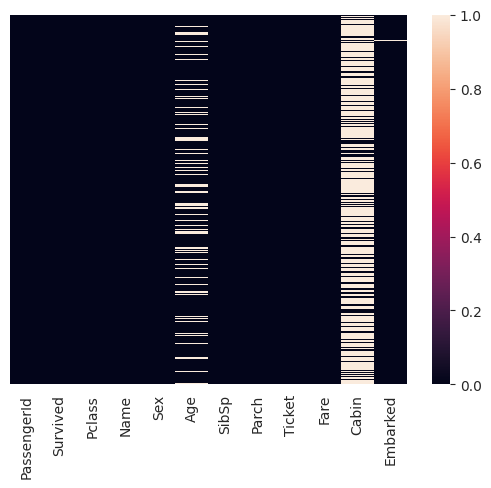

In [328]:
sns.heatmap(data.isnull(),yticklabels=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

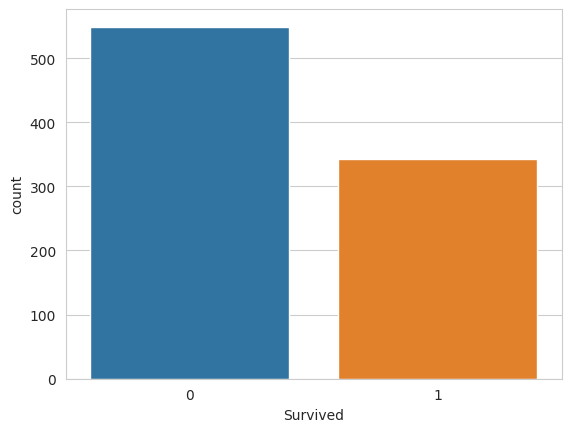

In [329]:
#sns.countplot(x='Survived',data=data)
sns.countplot(x=data.Survived)

<AxesSubplot:xlabel='Survived', ylabel='count'>

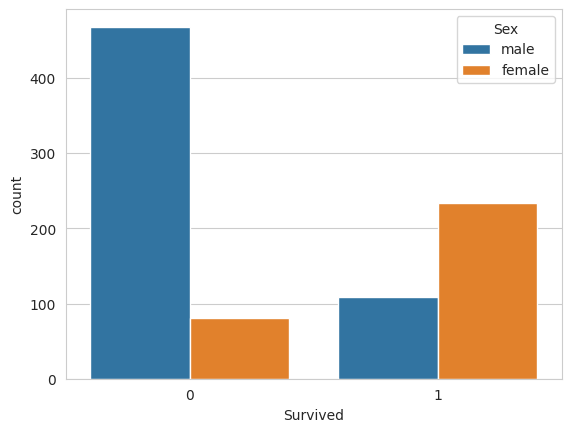

In [330]:
#sns.countplot(x = 'Survived', hue='Sex',data=data)
sns.countplot(x = data.Survived, hue=data.Sex)

<AxesSubplot:xlabel='Survived', ylabel='count'>

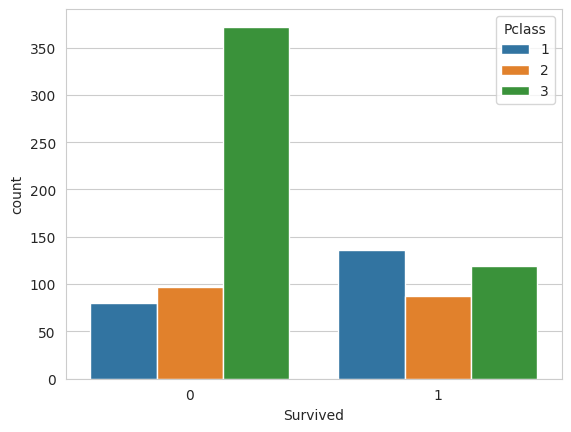

In [331]:
sns.countplot(x=data.Survived, hue=data.Pclass)

/tmp/ipykernel_5168/1410467099.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.Age.dropna(), bins=30, kde=False ,color='darkblue')


<AxesSubplot:xlabel='Age'>

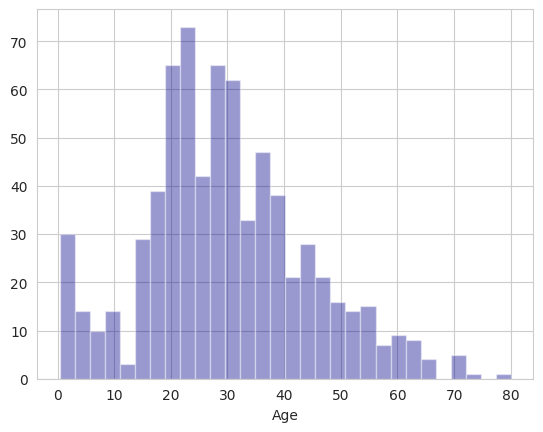

In [332]:
# kde : Kernel Density Estimation
sns.set_style('whitegrid')
sns.distplot(data.Age.dropna(), bins=30, kde=False ,color='darkblue')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

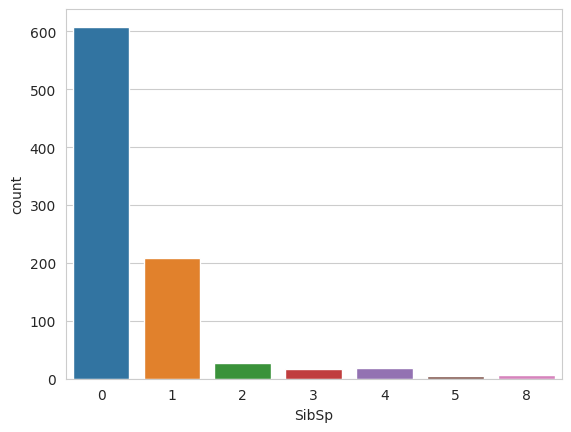

In [333]:
'''SibSp : Sibling spouce
    0 - person alone
    1 - person with a spouse or a sibling
    2 - person with two spouse or ....    
'''
sns.countplot(x = 'SibSp', data=data)

<AxesSubplot:>

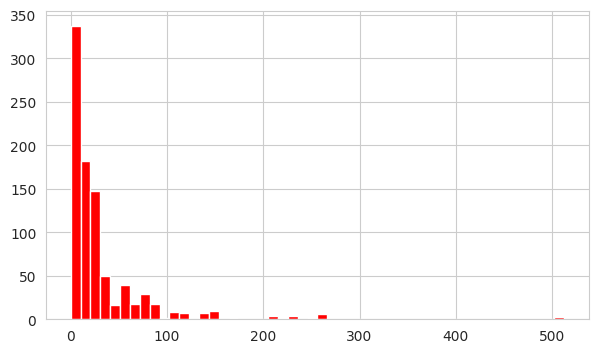

In [334]:
plt.figure(figsize=(7,4))
data.Fare.hist(bins=50,color='red')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

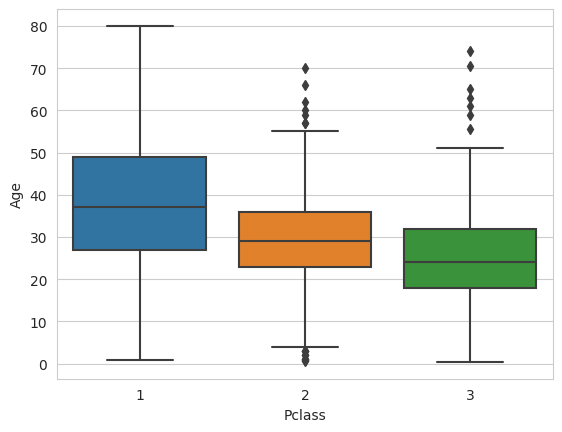

In [335]:
sns.boxplot(x = data.Pclass, y = data.Age)

In [336]:
p1 = data['Age'][data.Pclass==1].mean()
p2 = data['Age'][data.Pclass==2].mean()
p3 = data['Age'][data.Pclass==3].mean()
print(p1, p2, p3)

38.233440860215055 29.87763005780347 25.14061971830986


In [337]:
data['Age'] = data.groupby('Pclass')['Age'].transform(lambda x: x.fillna(int(x.mean())))

In [338]:
data['Age'].isnull().sum()

0

In [339]:
data.drop('Cabin', axis=1, inplace=True)

In [340]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [341]:
data[(data.Embarked!='S') & (data.Embarked!='Q') & (data.Embarked!='C')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [342]:
data.drop(data[(data.Embarked!='S') & (data.Embarked!='Q') & (data.Embarked!='C')].index,inplace=True)

In [343]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [344]:
data = pd.get_dummies(data=data, columns = ['Sex','Embarked'], drop_first=True)
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",25.0,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,0,0


In [349]:
y = data['Survived']
x = data.drop(columns=['PassengerId','Name','Ticket','Survived'])

In [353]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [351]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=20)

In [354]:
model = LogisticRegression()
model.fit(x_train,y_train)

/home/darnesh/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [355]:
pred = model.predict(x_test)

In [356]:
accuracy_score(y_test,pred)

0.8052434456928839

In [359]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       166
           1       0.76      0.71      0.73       101

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.81      0.80       267



Text(50.722222222222214, 0.5, 'Predicted')

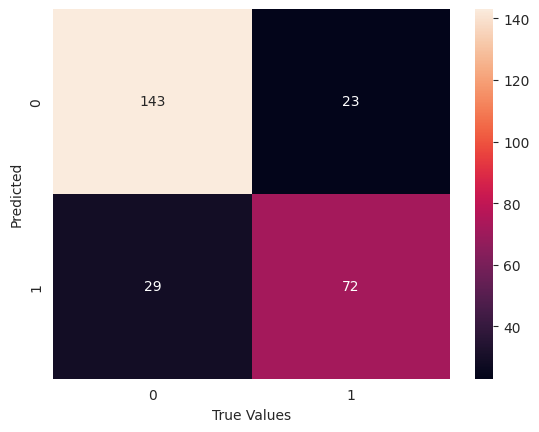

In [363]:
sns.heatmap(confusion_matrix(y_test,pred), annot=True, fmt='d')
plt.xlabel('True Values')
plt.ylabel('Predicted')